In [137]:
#Importing neccessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing

import math
import numpy as np

In this final project, I will be using a dataset that is based on video game info. To find trends, clean data and perform advanced regression models on the data.

The dataset can be found at: https://www.kaggle.com/datasets/ibriiee/video-games-sales-dataset-2022-updated-extra-feat 

In [3]:
df = pd.read_csv('Video_Games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


For the first part of this project we will visualize the data based on different metrics and draw some conclusions.

In [5]:
console = df.groupby('Platform')
avg = console.mean()

print(avg)

          Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Platform                                                               
2600          1982.137931  0.681203  0.041128  0.000000     0.006842   
3DO           1994.666667  0.000000  0.000000  0.033333     0.000000   
3DS           2013.126953  0.160558  0.118231  0.193596     0.025692   
DC            1999.942308  0.104423  0.032500  0.164615     0.005192   
DS            2008.190858  0.177821  0.087774  0.081585     0.027546   
GB            1995.958763  1.166531  0.487959  0.868571     0.083673   
GBA           2003.210851  0.228151  0.091545  0.057579     0.009404   
GC            2003.400369  0.240036  0.069622  0.038813     0.009317   
GEN           1993.034483  0.725862  0.208621  0.093103     0.033448   
GG            1992.000000  0.000000  0.000000  0.040000     0.000000   
N64           1998.531646  0.435799  0.128715  0.107273     0.013730   
NES           1987.153061  1.285102  0.215816  1.006633     0.05

<Figure size 640x480 with 0 Axes>

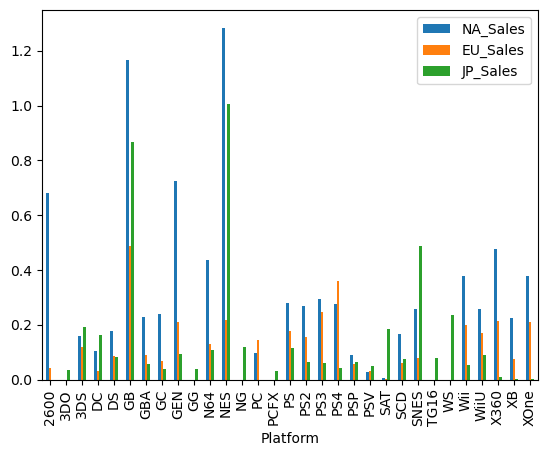

In [15]:
plt.figure()
avg[['NA_Sales','EU_Sales','JP_Sales']].plot(kind='bar')
plt.show()

From this bar plot we see that the gameboy,nes and xbox 360 sold the most in North America.

SNES and Wii sold the most in Japan.

The only console that Europe out sold Japan or North America was the PS4

<Figure size 640x480 with 0 Axes>

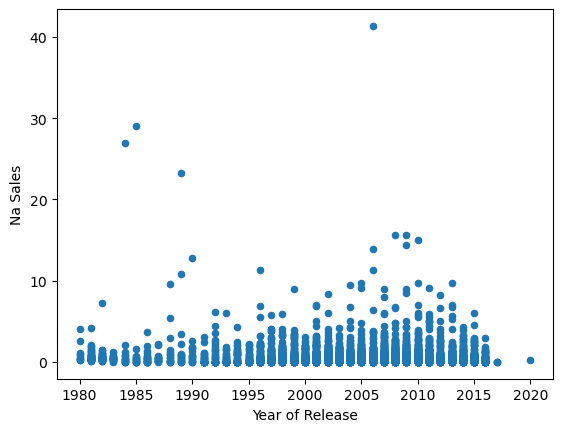

In [17]:
plt.figure()
df.plot.scatter('Year_of_Release', 'NA_Sales')
plt.xlabel('Year of Release')
plt.ylabel('Na Sales')
plt.show()

<Figure size 640x480 with 0 Axes>

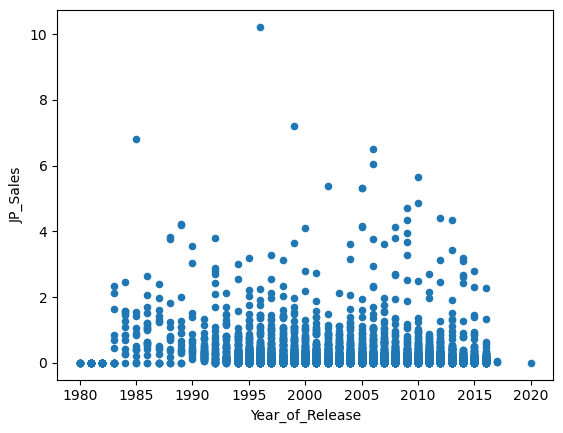

In [18]:
plt.figure()
df.plot.scatter('Year_of_Release', 'JP_Sales')
plt.xlabel('Year_of_Release')
plt.ylabel('JP_Sales')
plt.show()

<Figure size 640x480 with 0 Axes>

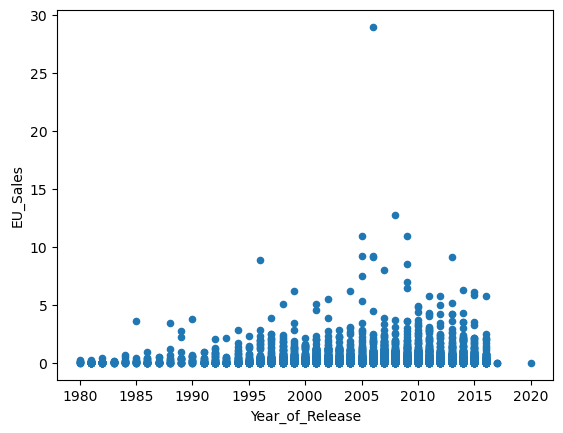

In [19]:
plt.figure()
df.plot.scatter('Year_of_Release', 'EU_Sales')
plt.xlabel('Year_of_Release')
plt.ylabel('EU_Sales')
plt.show()

The 3 scatter plots show the range of sales of games from 1980- 2020. 

There's a trend among all 3 regions where the sales of games is increasing. 


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Next we're going to do some linear regression. Focousing on how critic scores and sales within a region correalte with user score


In [17]:
df_complete = df.dropna(axis=0, how='any')
print(df_complete.head())

                    Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  

We have to clean the data first otherwise we will run into errors

In [94]:
#Na Sales Prediction

X = df_complete[['Critic_Score','NA_Sales']]
print("Here are the features (X):")
print(X.head())
print("Here is the outcome variable (y):")
y = df_complete['User_Score']
print(y)

Here are the features (X):
   Critic_Score  NA_Sales
0          76.0     41.36
2          82.0     15.68
3          80.0     15.61
6          89.0     11.28
7          58.0     13.96
Here is the outcome variable (y):
0          8
2        8.3
3          8
6        8.5
7        6.6
        ... 
16667    2.4
16677    8.8
16696    7.6
16700    5.8
16706    7.2
Name: User_Score, Length: 6825, dtype: object


In [95]:
X_train = X[0:30]
X_test = X[30:60]

y_train = y[0:30]
y_test = y[30:60]

I got rid of the all the other sales values beside NA as well as feature that was a string such as genre,name etc..

In [97]:
lm = linear_model.LinearRegression()

In [98]:
lm.fit(X_train, y_train)

LinearRegression()

In [99]:
print(lm.coef_)
print(lm.intercept_)

[0.0541772  0.04812815]
2.2528141439035476


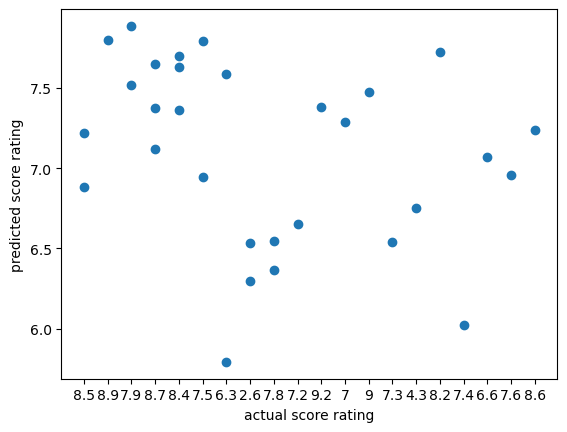

In [100]:
preds = lm.predict(X_test)

plt.figure()
plt.scatter(y_test, preds)
plt.xlabel('actual score rating')
plt.ylabel('predicted score rating')
plt.show()

In [124]:
#EU Sales Prediction

X = df_complete[['Critic_Score','EU_Sales']]
print("Here are the features (X):")
print(X.head())
print("Here is the outcome variable (y):")
y2 = df_complete['User_Score']
print(y)

Here are the features (X):
   Critic_Score  EU_Sales
0          76.0     28.96
2          82.0     12.76
3          80.0     10.93
6          89.0      9.14
7          58.0      9.18
Here is the outcome variable (y):
0          8
2        8.3
3          8
6        8.5
7        6.6
        ... 
16667    2.4
16677    8.8
16696    7.6
16700    5.8
16706    7.2
Name: User_Score, Length: 6825, dtype: object


In [125]:
X_train = X[0:30]
X_test = X[30:60]

y2_train = y[0:30]
y2_test = y[30:60]

In [126]:
lm = linear_model.LinearRegression()

In [127]:
lm.fit(X_train, y2_train)

LinearRegression()

In [128]:
print(lm.coef_)
print(lm.intercept_)

[0.05625866 0.07950175]
2.0036927763564307


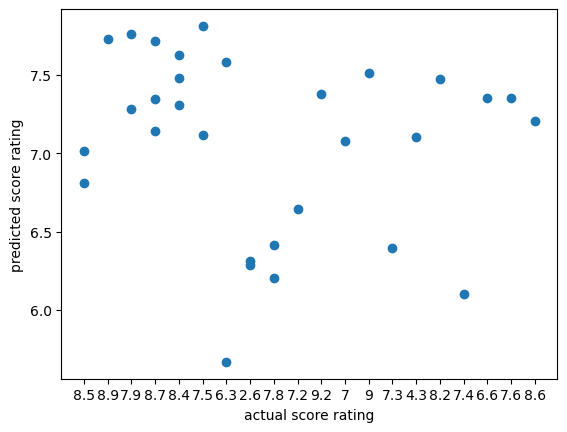

In [129]:
preds = lm.predict(X_test)

plt.figure()
plt.scatter(y2_test, preds)
plt.xlabel('actual score rating')
plt.ylabel('predicted score rating')
plt.show()

In [ ]:
#Jp Sales Prediction

X = df_complete[['Critic_Score','JP_Sales']]
print("Here are the features (X):")
print(X.head())
print("Here is the outcome variable (y):")
y = df_complete['User_Score']
print(y)

In [108]:
X_train = X[0:30]
X_test = X[30:60]

y_train = y[0:30]
y_test = y[30:60]

In [ ]:
lm = linear_model.LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

In [109]:
print(lm.coef_)
print(lm.intercept_)

[0.05625866 0.07950175]
2.0036927763564307


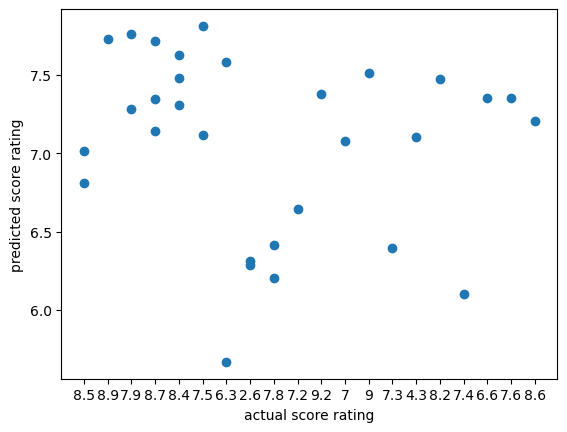

In [110]:
preds = lm.predict(X_test)

plt.figure()
plt.scatter(y_test, preds)
plt.xlabel('actual score rating')
plt.ylabel('predicted score rating')
plt.show()

The first thing I want to say is unfortauntely I was not able to find the mse scores due to a python error which I was unable to fix.

However a common trend between all 3 regions is the the sales of game in a region and crictic score don't have the strongest correaltion with the score rating of a user or the player. 

This would make sense as a gamer who wants to buy a game is not concerned with how well the game is doing sales wise and cares even less about a critic's score rating 

For the final part of the project, I will add a different dataset which is a dataset based on metacritic. Metacritic is a website where users can rate games and leave comments about it .

This will give us a better insight on user ratings on games

In [141]:
df2 = pd.read_csv('metacritic_game_info.csv')
df2.head()

,Unnamed: 0,Title,Year,Publisher,Genre,Platform,Metascore,Avg_Userscore,No_Players
0,0,The Legend of Zelda: Ocarina of Time,1998,Nintendo,Action Adventure;Fantasy,Nintendo64,99,9.1,1 Player
1,1,Tony Hawk's Pro Skater 2,2000,NeversoftEntertainment,Sports;Alternative;Skateboarding,PlayStation,98,7.4,1-2
2,2,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,PlayStation3,98,7.5,1 Player
3,3,SoulCalibur,1999,Namco,Action;Fighting;3D,Dreamcast,98,8.6,1-2
4,4,Grand Theft Auto IV,2008,RockstarNorth,Action Adventure;Modern;Modern;Open-World,Xbox360,98,7.9,1 Player


We will do a inner join using the complete dataframe and the metascore dataframe

In [169]:
df_inner = pd.merge(left=df_complete, right=df2, how='inner', left_on='Name', right_on='Title')
df_inner

df_final = df_inner.drop(['Title','Platform_y','Genre_y','Publisher_y'], axis=1)
df_final

,Name,Platform_x,Year_of_Release,Genre_x,Publisher_x,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Critic_Count,User_Score,User_Count,Developer,Rating,Unnamed: 0,Year,Metascore,Avg_Userscore,No_Players
0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,73.0,8.3,709.0,Nintendo,E,2668,2008,82,8.3,Up to 12
1,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,73.0,8,192.0,Nintendo,E,3421,2009,80,8.0,1-4
2,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,...,65.0,8.5,431.0,Nintendo,E,627,2006,89,8.6,No Online Multiplayer
3,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,...,80.0,8.4,594.0,Nintendo,E,941,2009,87,8.4,No Online Multiplayer
4,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,...,64.0,8.6,464.0,Nintendo,E,350,2005,91,8.6,4 Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,Wade Hixton's Counter Punch,GBA,2004.0,Sports,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01,...,13.0,9.5,4.0,Inferno Games,T,4357,2004,78,7.8,1 Player
5527,King's Bounty: Armored Princess,PC,2009.0,Role-Playing,1C Company,0.00,0.01,0.00,0.00,0.01,...,25.0,8.6,158.0,Katauri Interactive,T,2753,2009,82,8.6,not specified
5528,Trine,PC,2009.0,Action,Nobilis,0.00,0.01,0.00,0.00,0.01,...,50.0,8.2,488.0,"Frozenbyte, Inc.",E10+,2224,2009,83,8.0,1-3
5529,Trine,PC,2009.0,Action,Nobilis,0.00,0.01,0.00,0.00,0.01,...,50.0,8.2,488.0,"Frozenbyte, Inc.",E10+,3528,2009,80,8.2,1-3


In [174]:
df_met = df_final[['Name','Global_Sales','Metascore','Developer','User_Score']]
df_met.head()

,Name,Global_Sales,Metascore,Developer,User_Score
0,Mario Kart Wii,35.52,82,Nintendo,8.3
1,Wii Sports Resort,32.77,80,Nintendo,8
2,New Super Mario Bros.,29.80,89,Nintendo,8.5
3,New Super Mario Bros. Wii,28.32,87,Nintendo,8.4
4,Mario Kart DS,23.21,91,Nintendo,8.6


Using some of the features I want to look at from the merged dataset.

The metascore and userscore do not differ much, at least for the top 5 games 

<Figure size 640x480 with 0 Axes>

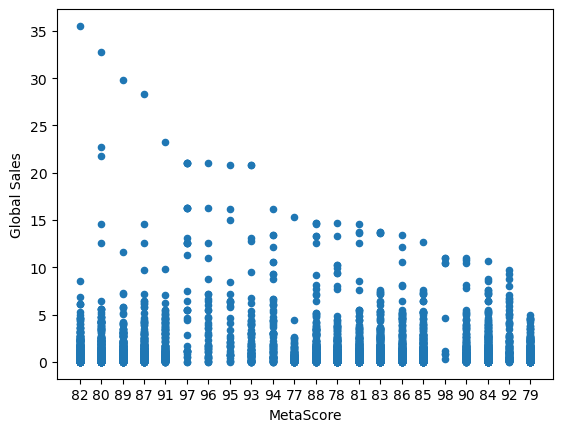

In [173]:
plt.figure()
df_met.plot.scatter('Metascore', 'Global_Sales')
plt.xlabel('MetaScore')
plt.ylabel('Global Sales')
plt.show()

First we created a plot showing how meta score and global sales are correatled.

Something interesting to note here is the fact that having a high meta score does not neccesarily mean the sales will be higher.
